# Part 1

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (14,10)
import plotly.express as px
import numpy as np

import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

In [5]:
from stocker import Stocker

In [6]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.


In [8]:
microsoft

In [9]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


Maximum Adj. Close = 96.77 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.06 on 1986-03-24 00:00:00.
Current Adj. Close = 89.47 on 2018-03-27 00:00:00.



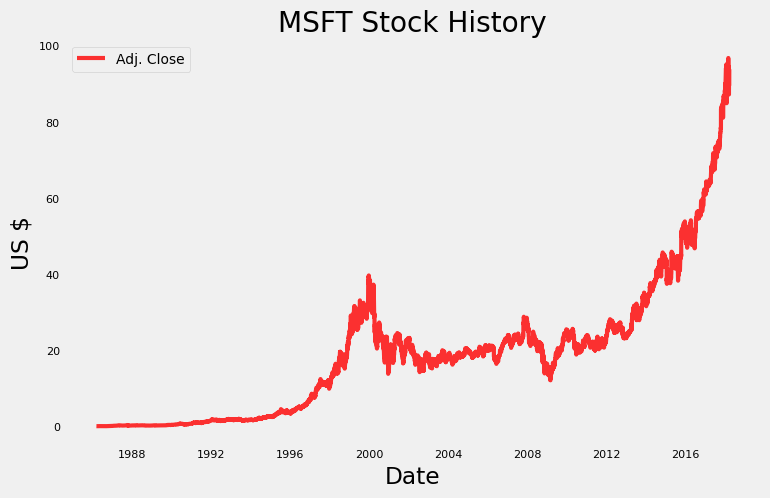

In [10]:
microsoft.plot_stock()

Maximum Daily Change = 2.08 on 2008-10-13 00:00:00.
Minimum Daily Change = -3.34 on 2017-12-04 00:00:00.
Current Daily Change = -5.47 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 591052200.00 on 2006-04-28 00:00:00.
Minimum Adj. Volume = 7425503.00 on 2017-11-24 00:00:00.
Current Adj. Volume = 53704562.00 on 2018-03-27 00:00:00.



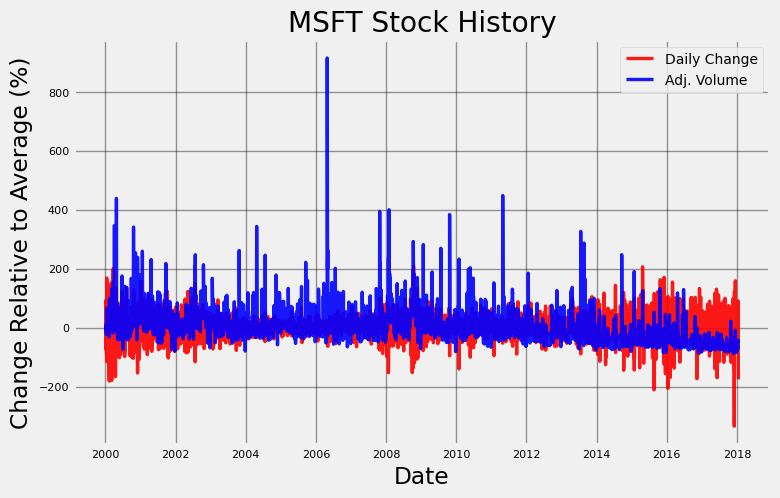

In [11]:
microsoft.plot_stock(start_date = '2000-01-03',  
                     end_date = '2018-01-16',  stats = ['Daily Change', 'Adj. Volume'],  plot_type='pct')

MSFT Total buy and hold profit from 1986-03-13 00:00:00 to 2018-01-16 00:00:00 for 100 shares = $8829.11


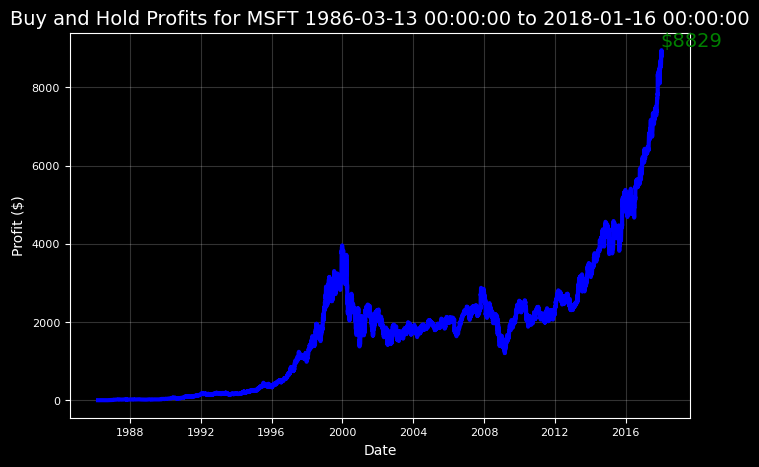

In [12]:
microsoft.buy_and_hold(start_date='1986-03-13', 
                       end_date='2018-01-16', nshares=100)

MSFT Total buy and hold profit from 1999-01-05 00:00:00 to 2002-01-03 00:00:00 for 100 shares = $-56.92


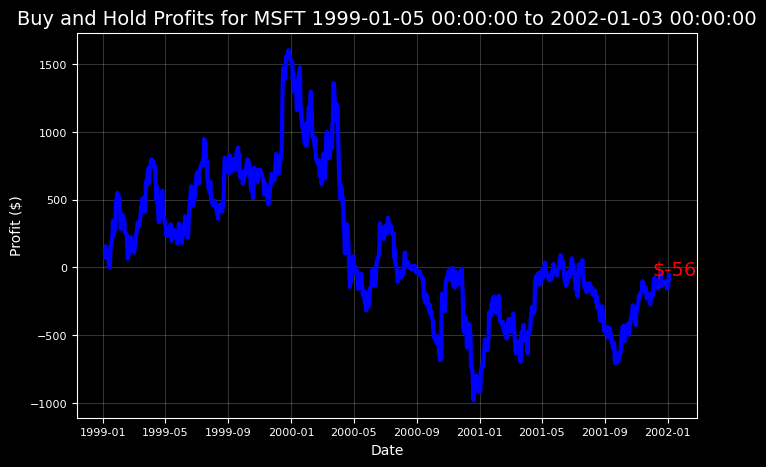

In [13]:
microsoft.buy_and_hold(start_date='1999-01-05', 
                      end_date='2002-01-03', nshares=100)

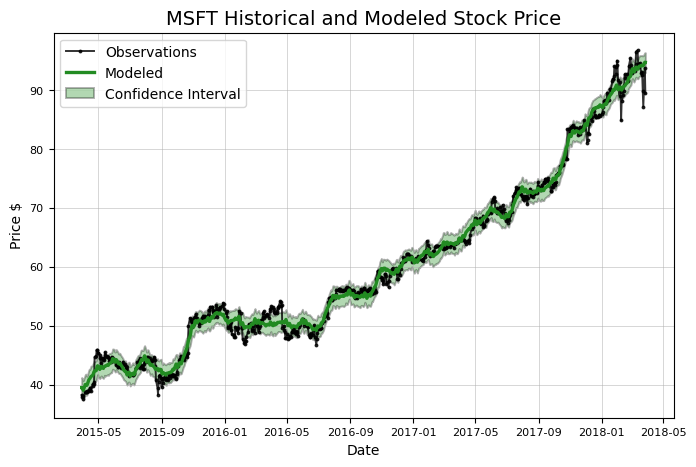

In [14]:
model, model_data = microsoft.create_prophet_model()

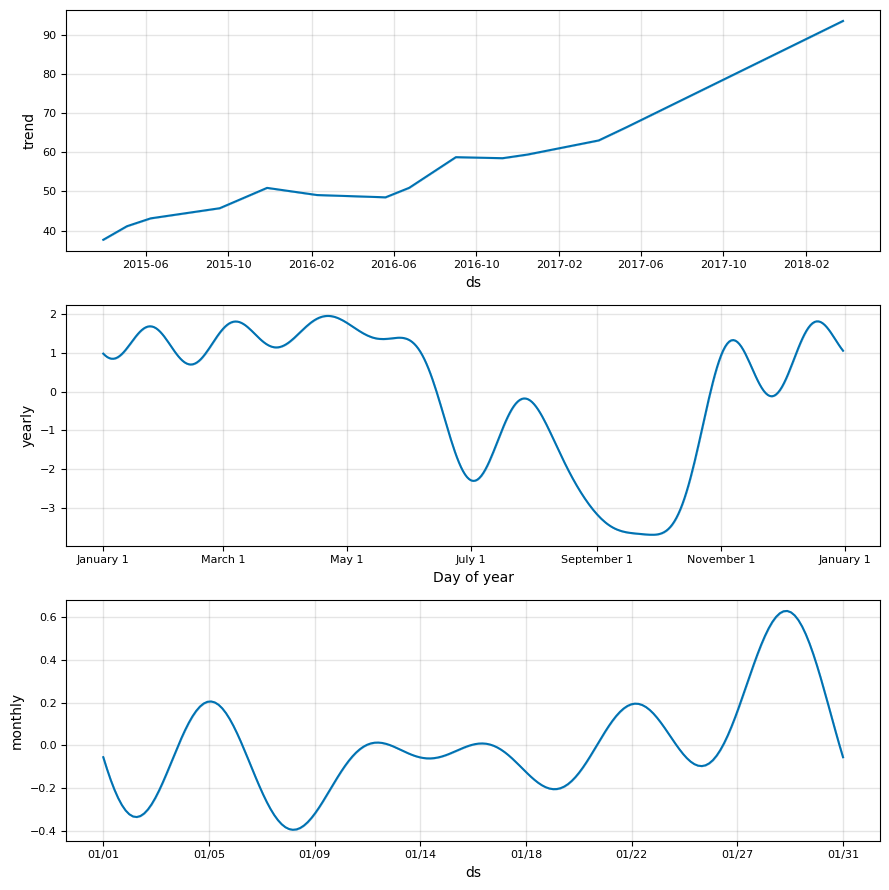

In [15]:
model.plot_components(model_data)
plt.show()


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
361 2016-09-01   55.966886 -1.321973
169 2015-11-27   51.353167 -1.118755
289 2016-05-20   48.886934  0.858204
120 2015-09-18   41.122995  0.550442
506 2017-03-31   64.816957  0.533068


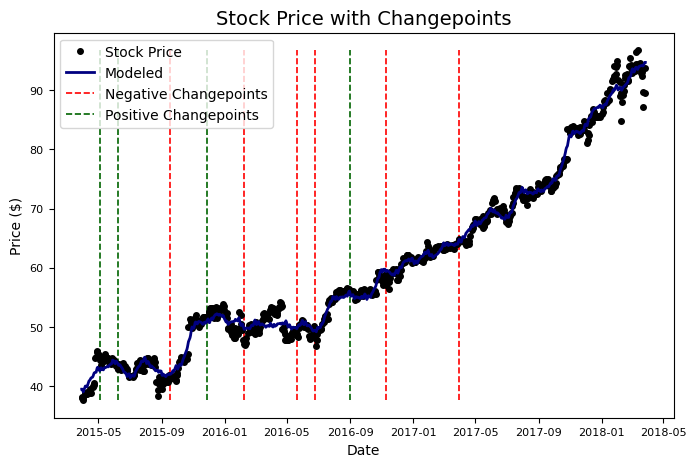

In [16]:
microsoft.changepoint_date_analysis()

In [17]:
microsoft.changepoint_date_analysis(search = 'Microsoft profit')



Google Search Trend retrieval failed.
The request failed: Google returned a response with code 400.


TypeError: cannot unpack non-iterable NoneType object

In [18]:
microsoft.changepoint_date_analysis(search = 'Microsoft Office')


Google Search Trend retrieval failed.
The request failed: Google returned a response with code 400.


TypeError: cannot unpack non-iterable NoneType object

Predicted Price on 2018-09-23 00:00:00 = $104.96


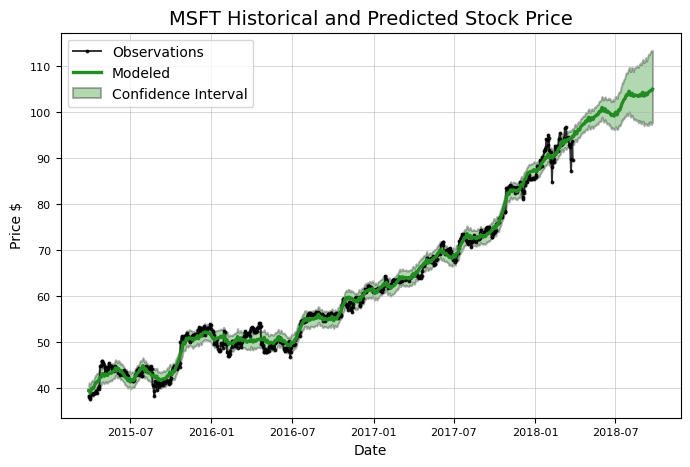

In [19]:
model, future = microsoft.create_prophet_model(days=180)

# Part 2

In [20]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 00:00:00 to 2018-03-27 00:00:00.


Maximum Adj. Close = 1598.39 on 2018-03-12 00:00:00.
Minimum Adj. Close = 1.40 on 1997-05-22 00:00:00.
Current Adj. Close = 1497.05 on 2018-03-27 00:00:00.



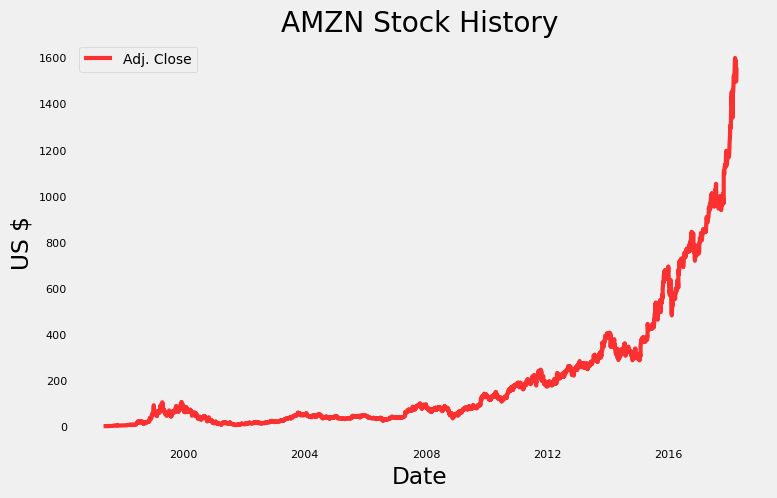

In [21]:
amazon.plot_stock()

Predicted Price on 2018-06-25 00:00:00 = $1878.61


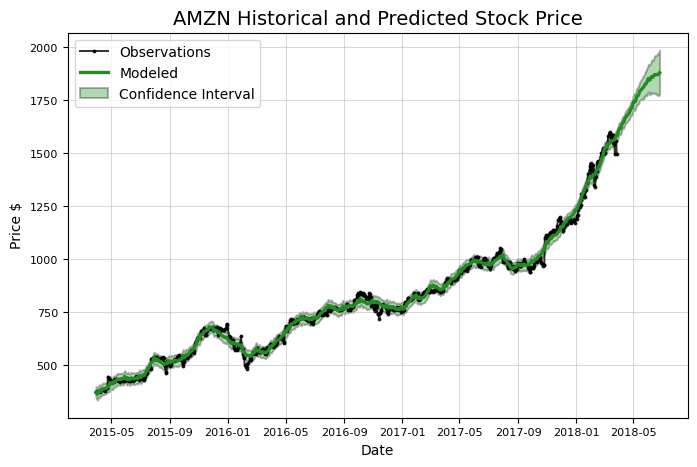

In [23]:
model, model_data = amazon.create_prophet_model(days=90)


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $1056.67.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $16.40.
Average Absolute Error on Testing  Data = $138.50.

When the model predicted an increase, the price increased 56.33% of the time.
When the model predicted a  decrease, the price decreased  40.00% of the time.

The actual value was within the 80% confidence interval 61.85% of the time.


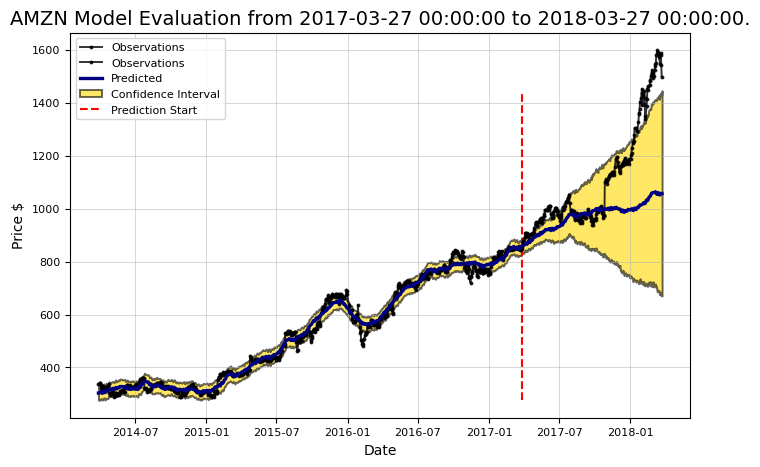

In [24]:
amazon.evaluate_prediction()

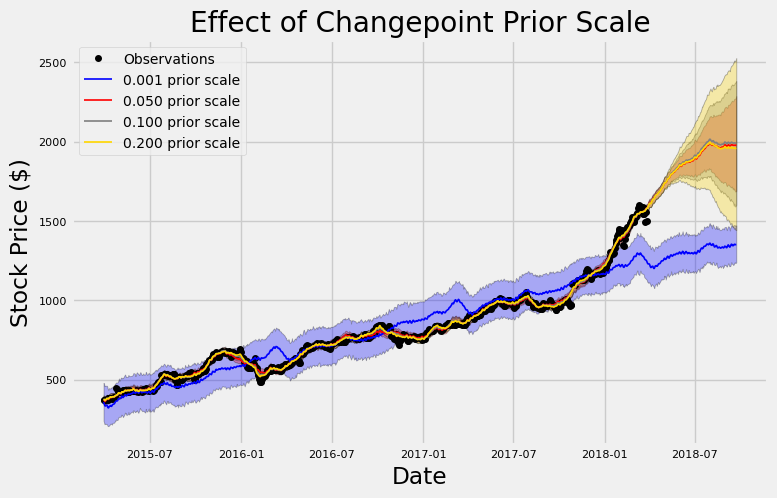

In [25]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

     cps  train_err  train_range    test_err  test_range
0  0.001  44.476286   152.674943  149.378762  152.893828
1  0.050  11.300059    36.169214  149.821587  128.633930
2  0.100  10.697391    34.561511  149.843862  174.035634
3  0.200   9.782182    32.105488  125.474132  317.468124


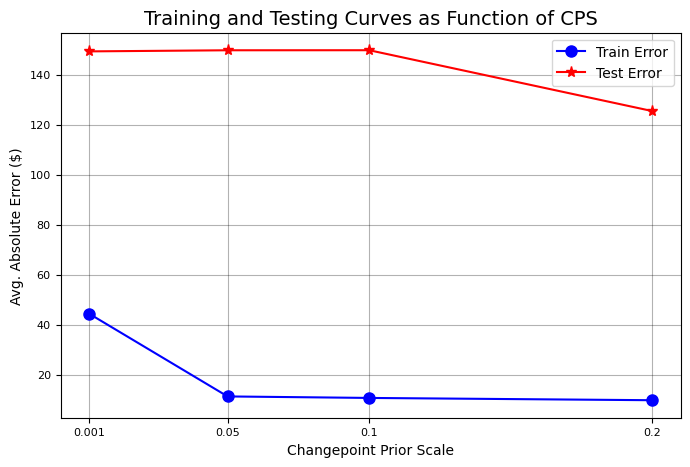

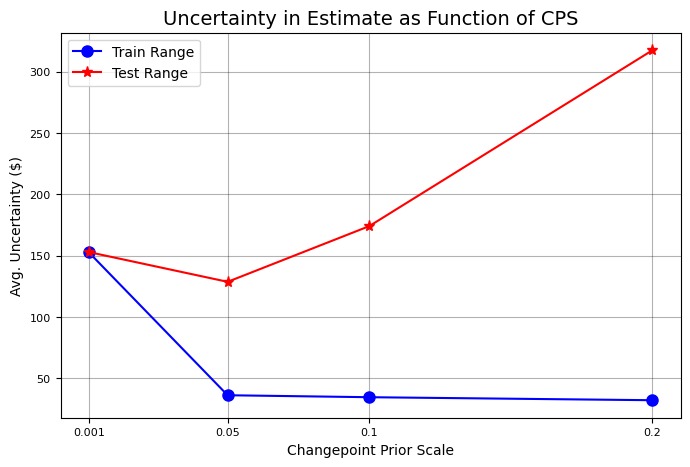

In [26]:
amazon.changepoint_prior_validation(start_date='2016-01-04', 
                                    end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.

    cps  train_err  train_range    test_err  test_range
0  0.15  10.317571    33.515687  145.674550  221.303569
1  0.20   9.782182    32.122107  125.474132  333.037708
2  0.25   9.426322    31.095979  114.649118  385.929006
3  0.40   8.648596    29.041159   78.118800  691.900343
4  0.50   8.371109    28.364042   70.706298  868.003197
5  0.60   8.264080    28.044516   76.062744  973.363915


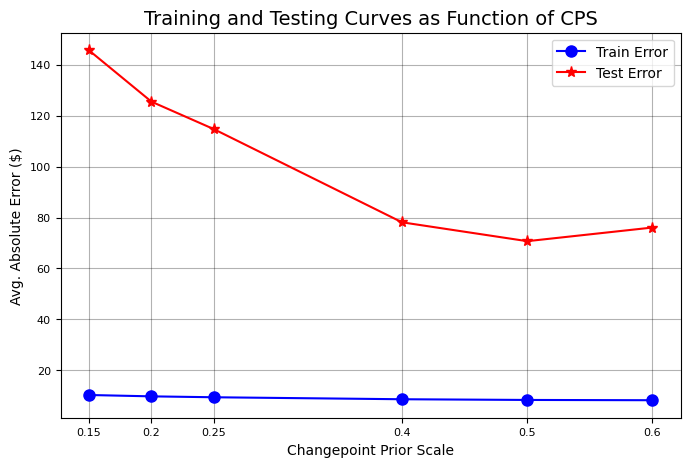

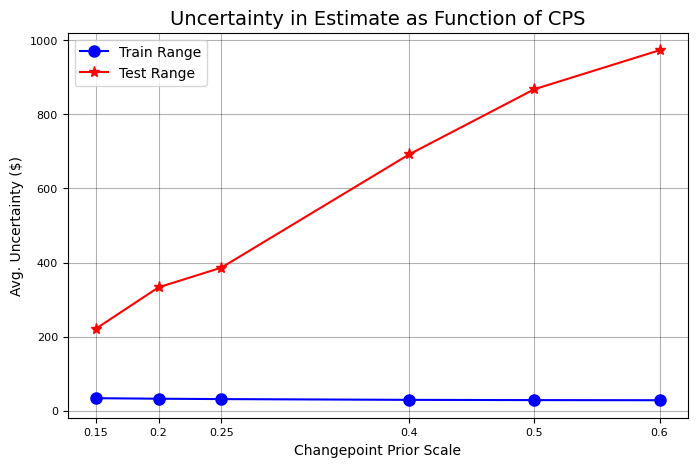

In [27]:
amazon.changepoint_prior_validation(start_date='2016-01-04', 
                                    end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

In [28]:
amazon.changepoint_prior_scale = 0.5


Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $989.89.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $10.86.
Average Absolute Error on Testing  Data = $185.20.

When the model predicted an increase, the price increased 59.46% of the time.
When the model predicted a  decrease, the price decreased  45.00% of the time.

The actual value was within the 80% confidence interval 83.13% of the time.


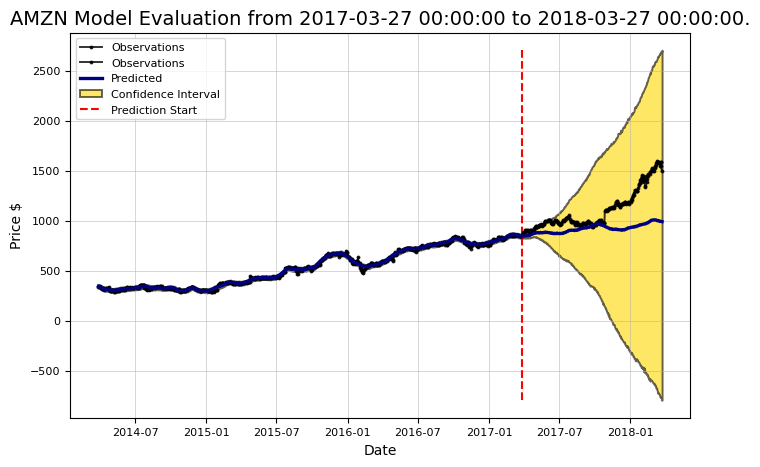

In [29]:
amazon.evaluate_prediction()

You played the stock market in AMZN from 2017-03-27 00:00:00 to 2018-03-27 00:00:00 with 1000 shares.

When the model predicted an increase, the price increased 59.46% of the time.
When the model predicted a  decrease, the price decreased  45.00% of the time.

The total profit using the Prophet model = $484970.00.
The Buy and Hold strategy profit =         $648740.00.

Thanks for playing the stock market!



G:\ML_2021\Diplom\toggle_menu\stocker.py:779: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred_increase["pred_profit"] = prediction_profit


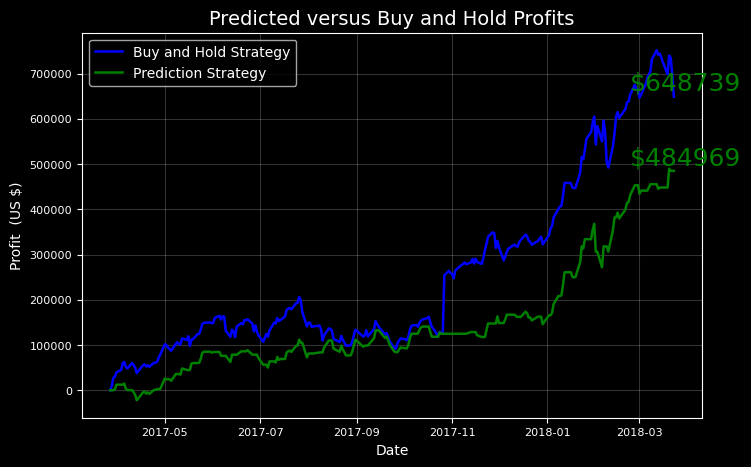

In [30]:
amazon.evaluate_prediction(nshares=1000)


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1576.239671   2.196433  1595.940559  1555.820598
2  2018-03-29  1580.173732   3.934061  1601.648785  1558.438874
3  2018-03-30  1586.840276   6.666543  1608.720553  1565.067488
5  2018-04-01  1600.248937  13.408661  1621.565068  1580.311088
6  2018-04-02  1602.087900   1.838963  1624.824148  1580.855051
8  2018-04-04  1601.793345   0.349411  1624.591476  1579.520472
9  2018-04-05  1605.744483   3.951138  1628.245487  1584.757336
10 2018-04-06  1612.778102   7.033619  1634.158376  1590.056719

Predicted Decrease: 

        Date     estimate    change        upper        lower
7 2018-04-03  1601.443934 -0.643966  1623.731226  1579.546257


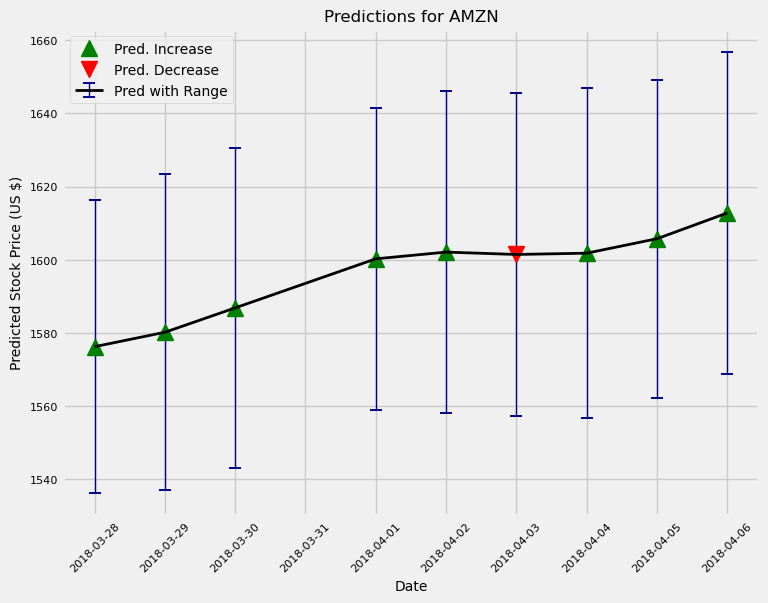


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1576.239671   2.196433  1596.826823  1554.168842
2  2018-03-29  1580.173732   3.934061  1603.398806  1558.884844
3  2018-03-30  1586.840276   6.666543  1608.693459  1566.310720
5  2018-04-01  1600.248937  13.408661  1623.786583  1578.250302
6  2018-04-02  1602.087900   1.838963  1624.360685  1580.415563
..        ...          ...        ...          ...          ...
91 2018-06-26  1829.367875   1.340996  2041.774202  1618.896725
93 2018-06-28  1829.486098   0.299998  2051.122488  1614.439270
94 2018-06-29  1832.244050   2.757951  2051.336388  1611.226729
96 2018-07-01  1841.668923   9.424873  2073.051619  1620.555872
97 2018-07-02  1842.927868   1.258945  2079.841025  1614.777790

[73 rows x 5 columns]

Predicted Decrease: 

          Date     estimate    change        upper        lower
7   2018-04-03  1601.443934 -0.643966  1622.003727  1580.064176
38  2018-05-04  1715.894326 -0.6102

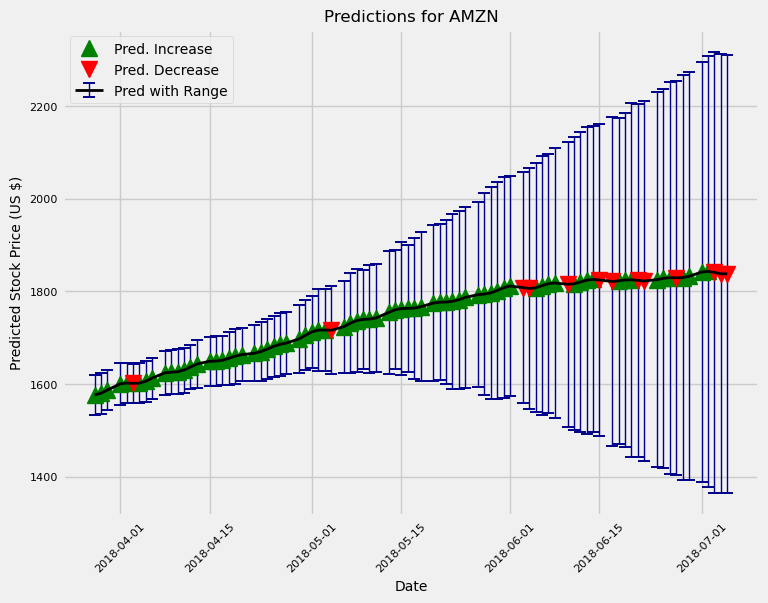

In [31]:
amazon.predict_future(days=10)
amazon.predict_future(days=100)